<a href="https://colab.research.google.com/github/Shrinivas-Joshi18/Travelling_Salesman/blob/main/tsp_solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best route: [7 2 1 4 3 0 5 6 8 9]
Total distance: 2.86256712743547


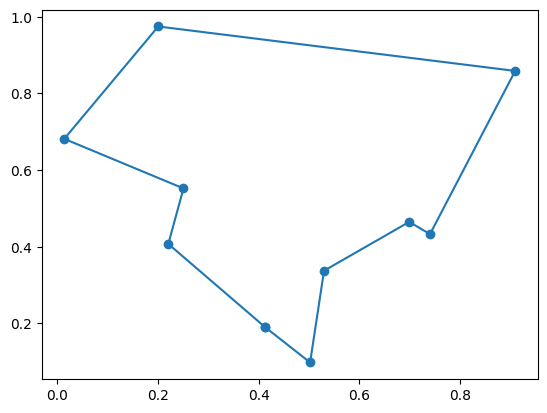

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the total distance of a route
def calculate_total_distance(route, distance_matrix):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distance_matrix[route[i], route[i + 1]]
    total_distance += distance_matrix[route[-1], route[0]]  # Return to the starting city
    return total_distance

# Function to generate a random population of routes
def generate_population(num_routes, num_cities):
    population = []
    for _ in range(num_routes):
        route = np.random.permutation(num_cities)
        population.append(route)
    return population

# Function to perform crossover between two routes
def crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1) - 1)  # Ensure crossover_point is an integer
    child = np.hstack((parent1[:crossover_point], [city for city in parent2 if city not in parent1[:crossover_point]]))
    return child

# Function to perform mutation on a route
def mutate(route):
    mutation_point1, mutation_point2 = np.random.choice(len(route), 2, replace=False)
    route[mutation_point1], route[mutation_point2] = route[mutation_point2], route[mutation_point1]
    return route

# Function to evolve the population using genetic algorithm
def evolve(population, distance_matrix, num_generations):
    for generation in range(num_generations):
        population = sorted(population, key=lambda x: calculate_total_distance(x, distance_matrix))
        new_population = population[:2]  # Keep the two best routes
        while len(new_population) < len(population):
            parents = np.random.choice(np.concatenate(population[:10]), 2, replace=False)
            parent1, parent2 = population[parents[0]], population[parents[1]]
            child = crossover(parent1, parent2)
            if np.random.rand() < 0.1:
                child = mutate(child)
            new_population.append(child)
        population = new_population
    return population[0]

# Function to visualize the TSP route
def visualize_route(route, cities):
    x = [cities[i][0] for i in route]
    y = [cities[i][1] for i in route]
    x.append(x[0])  # Return to the starting city
    y.append(y[0])
    plt.plot(x, y, marker='o')
    plt.show()


# Example usage
num_cities = 10
cities = np.random.rand(num_cities, 2)  # Randomly generate city coordinates
distance_matrix = np.linalg.norm(cities[:, np.newaxis, :] - cities, axis=2)  # Euclidean distance matrix

num_routes = 50
num_generations = 500
population = generate_population(num_routes, num_cities)

best_route = evolve(population, distance_matrix, num_generations)
print("Best route:", best_route)
print("Total distance:", calculate_total_distance(best_route, distance_matrix))

visualize_route(best_route, cities)